In [1]:
import matplotlib.pyplot as plt
import anndata as adata
import scanpy as sc
import pandas as pd
from harmonypy import run_harmony

import snapatac2 as snap
import anndata as ad
import pandas as pd
import scanpy as sc
import scvi
import numpy as np

scvi.settings.seed = 0
snap.__version__
import warnings

warnings.filterwarnings("ignore")


/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/junyichen/anaconda3/envs/snapatac2/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
INFO: Seed set to 0
2025-07-08 15:27:42 - INFO - Seed set to 0


In [2]:
import os
default_n_threads = 8
os.environ['OPENBLAS_NUM_THREADS'] = f"{default_n_threads}"
os.environ['MKL_NUM_THREADS'] = f"{default_n_threads}"
os.environ['OMP_NUM_THREADS'] = f"{default_n_threads}"

In [3]:
!export OPENBLAS_NUM_THREADS=8
!export MKL_NUM_THREADS=8
!export OMP_NUM_THREADS=8

In [4]:
if not os.path.exists('/data2st1/junyi/methlyatlas/atac/ftp.ncbi.nlm.nih.gov/geo/series/GSE246nnn/GSE246791/suppl/wmb_sa2_anndata/sa2_logCPM_gmat_3r.h5ad'):
    print('Not exitst, processing the atlas data...')
    adata_atlas= sc.read_h5ad('/data2st1/junyi/methlyatlas/atac/ftp.ncbi.nlm.nih.gov/geo/series/GSE246nnn/GSE246791/suppl/wmb_sa2_anndata/sa2_logCPM_gmat.h5ad')
    df_meta_atlas = pd.read_csv('/data2st1/junyi/data/SI_Tables/SI_Table_2_Metadata_table_for_all_the_2.3_million_nuclei_in_the_snATAC-seq_data.txt',sep='\t',index_col=0)
    df_sample_info = pd.read_excel("/data2st1/junyi/data/SI_Tables/SI Table 1 Sample and dissection summary.xlsx")
    df_sample_info.MajorRegion.unique()
    df_selected = df_sample_info[((df_sample_info['MajorRegion'].isin(['AMY','HPF'])) | (df_sample_info['RegionName'].str.contains('PFC'))) & (df_sample_info['DetailRegion']!='ENT')]
    adata_atlas_3r = adata_atlas[adata_atlas.obs['sample'].isin(df_selected['sample'].unique())]
    adata_atlas_3r.obs = df_meta_atlas.loc[adata_atlas_3r.obs.index]
    adata_atlas_3r.write_h5ad('/data2st1/junyi/methlyatlas/atac/ftp.ncbi.nlm.nih.gov/geo/series/GSE246nnn/GSE246791/suppl/wmb_sa2_anndata/sa2_logCPM_gmat_3r.h5ad')
else:
    print('Already exists, loading the atlas data...')
    adata_atlas_3r = sc.read_h5ad('/data2st1/junyi/methlyatlas/atac/ftp.ncbi.nlm.nih.gov/geo/series/GSE246nnn/GSE246791/suppl/wmb_sa2_anndata/sa2_logCPM_gmat_3r.h5ad')

Already exists, loading the atlas data...


In [ ]:
df_sample_info = pd.read_excel("/data2st1/junyi/data/SI_Tables/SI Table 1 Sample and dissection summary.xlsx")


In [24]:
df_selected = df_sample_info[((df_sample_info['MajorRegion'].isin(['AMY','HPF'])) | (df_sample_info['RegionName'].str.contains('PFC'))) & (df_sample_info['DetailRegion']!='ENT')]


In [25]:
df_selected

,sample,DissectionRegion,biorep,time,RegionName,MajorRegion,SubRegion,DetailRegion,PotentialOverlap,Slice,MajorRegionColor,SubRegionColor,DissectionRegionColor,NumMiceInPool,Instrument,ProtocalVersion
11,CEMBA180123_2A,2A,early,180123,PFC-1,Isocortex,PFC,"ACAd,PL,ILA",ORBm,2,#176CDB,#F2CE80,#F2CE80,23,HiSeq2500,snATACseq_CEMBA_v1
12,CEMBA180129_3A,3A,early,180129,PFC-2,Isocortex,PFC,"ACAd,PL,ILA","DP,ORBm",3,#176CDB,#F2CE80,#9B7260,23,HiSeq2500,snATACseq_CEMBA_v1
13,CEMBA180130_3A,3A,later,180130,PFC-2,Isocortex,PFC,"ACAd,PL,ILA","DP,ORBm",3,#176CDB,#F2CE80,#9B7260,23,HiSeq2500,snATACseq_CEMBA_v1
72,CEMBA190207_2A,2A,later,190207,PFC-1,Isocortex,PFC,"ACAd,PL,ILA",ORBm,2,#176CDB,#F2CE80,#F2CE80,6,HiSeq4000,snATACseq_CEMBA_v2
74,CEMBA190212_9H,9H,early,190212,CA-ii,HPF,CA1-3,"CA1,CA2,CA3","DG,FC",9,#d62728,#d62728,#DC831E,10,HiSeq4000,snATACseq_CEMBA_v2
75,CEMBA190212_9J,9J,early,190212,DG-2,HPF,DG,DG,"CA1,CA2,CA3,FC",9,#d62728,#FFAAAA,#EF486F,10,HiSeq4000,snATACseq_CEMBA_v2
76,CEMBA190214_11E,11E,early,190214,CA-iv,HPF,CA1-3,"CA1,CA2,CA3,POST,SUB,ProS","DG,HATA",11,#d62728,#d62728,#3C1518,10,HiSeq4000,snATACseq_CEMBA_v2
77,CEMBA190214_11F,11F,early,190214,DG-4,HPF,DG,DG,"CA1,CA2,CA3,SUB,ProS",11,#d62728,#FFAAAA,#800000,10,HiSeq4000,snATACseq_CEMBA_v2
78,CEMBA190219_9H,9H,later,190219,CA-ii,HPF,CA1-3,"CA1,CA2,CA3","DG,FC",9,#d62728,#d62728,#DC831E,10,HiSeq4000,snATACseq_CEMBA_v2
79,CEMBA190219_9J,9J,later,190219,DG-2,HPF,DG,DG,"CA1,CA2,CA3,FC",9,#d62728,#FFAAAA,#EF486F,10,HiSeq4000,snATACseq_CEMBA_v2


In [28]:
atac_meta_merge = adata_atlas_3r.obs.merge(df_selected[['sample','MajorRegion','RegionName','DetailRegion']], left_on='Sample', right_on='sample', how='left')

In [33]:
atac_meta_merge.index = adata_atlas_3r.obs.index

In [35]:
adata_atlas_3r.obs = atac_meta_merge

In [37]:
adata_atlas_3r.obs

,Sample,Barcode,# of Fragments,TSSe,L1,L2,L3,L4,pL4,NeuronTransmitter,Subclass,sample,MajorRegion,RegionName,DetailRegion
CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGGTACTGAC,CEMBA180123_2A,AGCGATAGAACCAGGTAACGAACGGTACTGAC,9302,10.768631,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGTATAGCCT,CEMBA180123_2A,AGCGATAGAACCAGGTAACGAACGTATAGCCT,10771,11.050157,8,8-3,8-3-1,8-3-1-1,8-3-1-1,Glut,030 L6 CT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTAGGCGAAG,CEMBA180123_2A,AGCGATAGAACCAGGTAATGACGTAGGCGAAG,4250,14.316392,24,24-1,24-1-2,24-1-2-1,24-1-2-1,Glut,032 L5 NP CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTGGCTCTGA,CEMBA180123_2A,AGCGATAGAACCAGGTAATGACGTGGCTCTGA,2438,13.498623,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTATTCGTTGTAATCTTA,CEMBA180123_2A,AGCGATAGAACCAGGTATTCGTTGTAATCTTA,2279,14.705882,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEMBA200910_9G.TTTGGCGCTTTTCAGTCGCCTA,CEMBA200910_9G,TTTGGCGCTTTTCAGTCGCCTA,6409,26.700572,3,3-1,3-1-2,3-1-2-1,3-1-2-1,NN,319 Astro-TE NN,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTCGGTTCCCAC,CEMBA200910_9G,TTTGGCGCTTTTCGGTTCCCAC,9391,16.303884,2,2-5,2-5-16,2-5-16-1,2-5-16-1,GABA,073 MEA-BST Sox6 Gaba,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTGATGCGACCA,CEMBA200910_9G,TTTGGCGCTTTTGATGCGACCA,14263,15.909091,7,7-9,7-9-4,7-9-4-2,7-9-4-p2,Glut,014 LA-BLA-BMA-PA Glut,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTGTCTCTTGGG,CEMBA200910_9G,TTTGGCGCTTTTGTCTCTTGGG,5104,17.428168,3,3-1,3-1-2,3-1-2-1,3-1-2-1,NN,319 Astro-TE NN,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"


# Read single cell data

In [10]:
adata_sc = adata.read_h5ad("/data1st1/sch/20250626/anndata_before_intergration_anno.h5ad")
# Fix cell type 22 to neuron
# cluster_22_cells = adata_sc.obs_names[adata_sc.obs['Leiden_clusters_res1.0'] == '22']
# adata_sc.obs.loc[cluster_22_cells, 'celltype.L1'] = 'Neuron'

In [11]:
adata_sc.obs['region'].unique()

['AMY', 'PFC', 'HPF', 'MB', 'TH', 'STR', 'HY', 'Isocortex']
Categories (8, object): ['AMY', 'Isocortex', 'HPF', 'HY', 'MB', 'PFC', 'STR', 'TH']

In [12]:
adata_sc.obs['sex'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [13]:
adata_sc = adata_sc[adata_sc.obs.region.isin(['AMY', 'HPF', 'PFC']) & adata_sc.obs.sex.isin(['M'])]

In [14]:
adata_sc.obs['Neurotransmitter_celltype'].unique()

['NN', 'GABAergic', 'Glutamatergic', NaN]
Categories (3, object): ['GABAergic', 'Glutamatergic', 'NN']

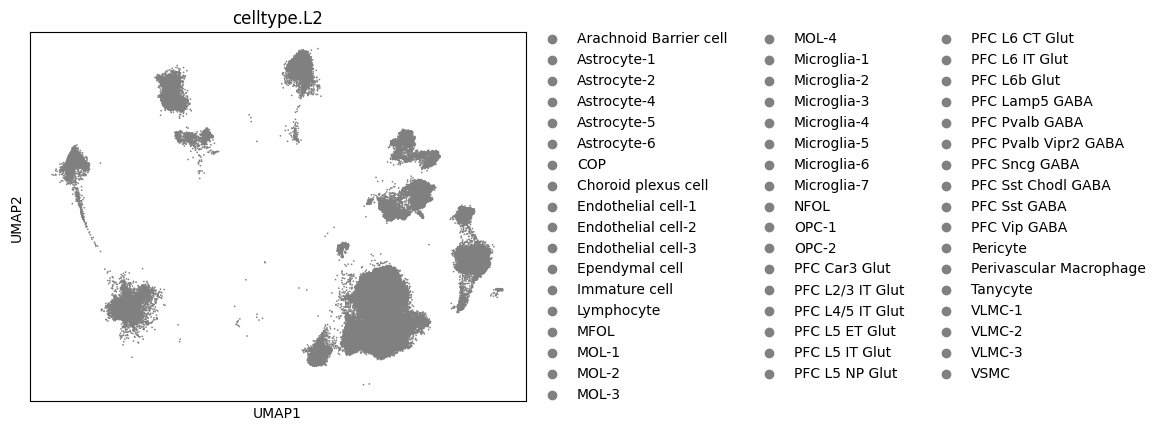

In [15]:
sc.pl.umap(adata_sc[adata_sc.obs.region.isin(['PFC'])], color=['celltype.L2'],size=6, show=True)

In [16]:
adata_sc.obs.rename(columns={'batch': 'sample'}, inplace=True)

In [17]:
adata_sc.obs['region'] = adata_sc.obs['region'].cat.rename_categories({'HPF':'HIP'})


In [40]:
adata_atlas_3r[(adata_atlas_3r.obs['MajorRegion']=='HPF') & (adata_atlas_3r.obs['NeuronTransmitter'].isin(['GABA', 'Glut']))]

View of AnnData object with n_obs × n_vars = 117820 × 55291
    obs: 'Sample', 'Barcode', '# of Fragments', 'TSSe', 'L1', 'L2', 'L3', 'L4', 'pL4', 'NeuronTransmitter', 'Subclass', 'sample', 'MajorRegion', 'RegionName', 'DetailRegion'
    uns: 'AnnDataSet', 'log1p'
    layers: 'sa2default_raw'

In [42]:
adata_atlas_3r.obs

,Sample,Barcode,# of Fragments,TSSe,L1,L2,L3,L4,pL4,NeuronTransmitter,Subclass,sample,MajorRegion,RegionName,DetailRegion
CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGGTACTGAC,CEMBA180123_2A,AGCGATAGAACCAGGTAACGAACGGTACTGAC,9302,10.768631,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGTATAGCCT,CEMBA180123_2A,AGCGATAGAACCAGGTAACGAACGTATAGCCT,10771,11.050157,8,8-3,8-3-1,8-3-1-1,8-3-1-1,Glut,030 L6 CT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTAGGCGAAG,CEMBA180123_2A,AGCGATAGAACCAGGTAATGACGTAGGCGAAG,4250,14.316392,24,24-1,24-1-2,24-1-2-1,24-1-2-1,Glut,032 L5 NP CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTGGCTCTGA,CEMBA180123_2A,AGCGATAGAACCAGGTAATGACGTGGCTCTGA,2438,13.498623,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
CEMBA180123_2A.AGCGATAGAACCAGGTATTCGTTGTAATCTTA,CEMBA180123_2A,AGCGATAGAACCAGGTATTCGTTGTAATCTTA,2279,14.705882,4,4-2,4-2-1,4-2-1-1,4-2-1-1,Glut,007 L2/3 IT CTX Glut,CEMBA180123_2A,Isocortex,PFC-1,"ACAd,PL,ILA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEMBA200910_9G.TTTGGCGCTTTTCAGTCGCCTA,CEMBA200910_9G,TTTGGCGCTTTTCAGTCGCCTA,6409,26.700572,3,3-1,3-1-2,3-1-2-1,3-1-2-1,NN,319 Astro-TE NN,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTCGGTTCCCAC,CEMBA200910_9G,TTTGGCGCTTTTCGGTTCCCAC,9391,16.303884,2,2-5,2-5-16,2-5-16-1,2-5-16-1,GABA,073 MEA-BST Sox6 Gaba,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTGATGCGACCA,CEMBA200910_9G,TTTGGCGCTTTTGATGCGACCA,14263,15.909091,7,7-9,7-9-4,7-9-4-2,7-9-4-p2,Glut,014 LA-BLA-BMA-PA Glut,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"
CEMBA200910_9G.TTTGGCGCTTTTGTCTCTTGGG,CEMBA200910_9G,TTTGGCGCTTTTGTCTCTTGGG,5104,17.428168,3,3-1,3-1-2,3-1-2-1,3-1-2-1,NN,319 Astro-TE NN,CEMBA200910_9G,AMY,AMY-3,"CTXsp,sAMY,COA,NLOT,PAA,TR"


In [62]:
adata_atlas_3r[(adata_atlas_3r.obs['MajorRegion']=='HPF') & (adata_atlas_3r.obs['NeuronTransmitter'].isin(['GABA', 'Glut']))]

View of AnnData object with n_obs × n_vars = 117820 × 55291
    obs: 'Sample', 'Barcode', '# of Fragments', 'TSSe', 'L1', 'L2', 'L3', 'L4', 'pL4', 'NeuronTransmitter', 'Subclass', 'sample', 'MajorRegion', 'RegionName', 'DetailRegion'
    uns: 'AnnDataSet', 'log1p'
    layers: 'sa2default_raw'

In [88]:
adata_sc_region_neuron

View of AnnData object with n_obs × n_vars = 68466 × 32285
    obs: 'sample', 'region', 'tech', 'donor', 'sex', 'status', 'folder', 'path', 'capture_rate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'doublet_score', 'predicted_doublet', 'outlier', 'leiden', 'predicted_labels', 'conf_score', 'pred_mwb', 'pred_mdg', 'pred_mih', 'pred_mpd', 'level1', 'level2', 'group', 'filter1', 'trd', 'treatment', 'louvain', 'Neurotransmitter_celltype', 'celltype.L1', 'celltype.L2', 'predict.subclass', 'umap_seurat_1', 'umap_seurat_2'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'celltype.L2_colors', 'donor_colors', 'gender_colors', 'hvg', 'leiden', 'level1_colors', 'level2_colors', 'log1p', 'neighbors', 'pca', 'pred_mdg_colors', 

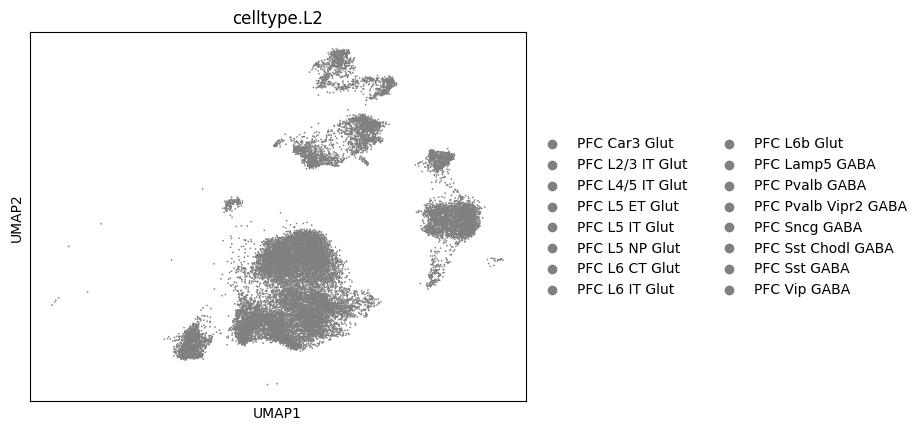

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


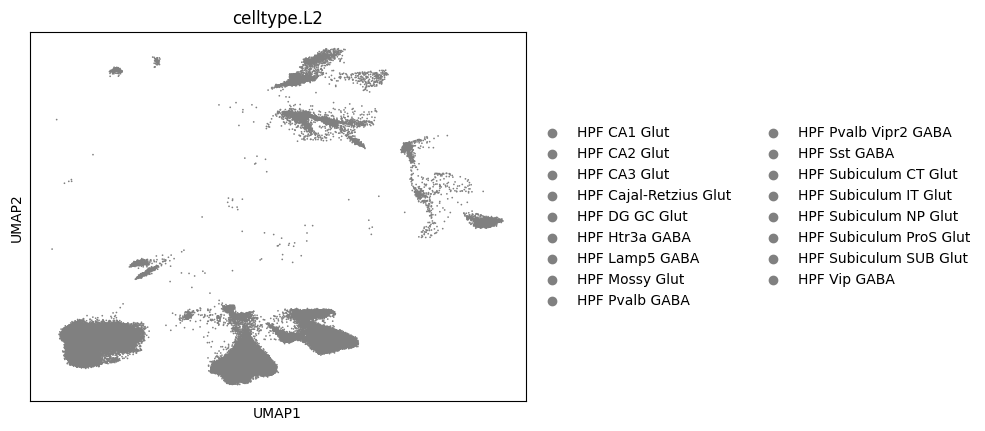

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


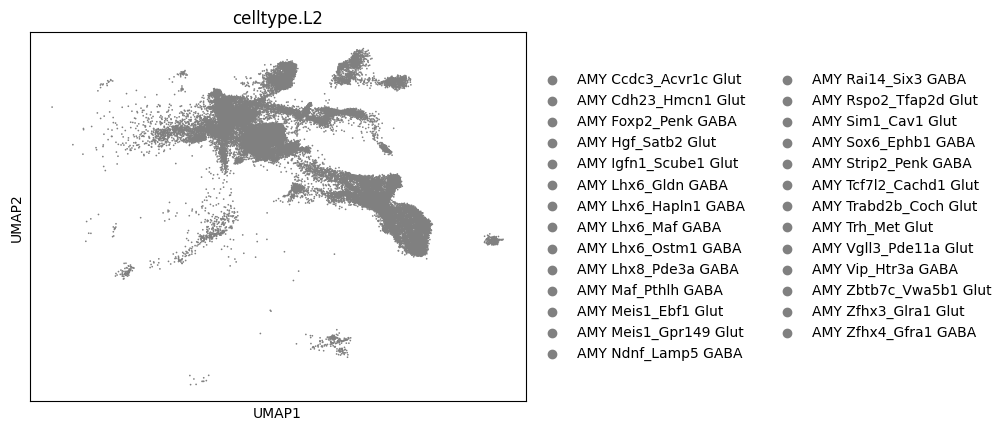

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


In [90]:
for region in adata_sc.obs['region'].unique():
    adata_atac_region_neuron = adata_atlas_3r[(adata_atlas_3r.obs['region']==region) & (adata_atlas_3r.obs['NeuronTransmitter'].isin(['GABA', 'Glut']))]         
    adata_sc_region_neuron = adata_sc[adata_sc.obs.region.isin([region]) & adata_sc.obs.Neurotransmitter_celltype.isin(['GABAergic', 'Glutamatergic'])]

    # downsample the sc or atac data to the same number of cells
    n_cells = min(adata_sc_region_neuron.shape[0], adata_atac_region_neuron.shape[0])
    if n_cells!= adata_sc_region_neuron.shape[0]:
        adata_sc_region_neuron = sc.pp.subsample(adata_sc_region_neuron, n_obs=n_cells,copy=True)
    else:
        adata_atac_region_neuron = sc.pp.subsample(adata_atac_region_neuron, n_obs=n_cells,copy=True)        

    sc.pl.umap(adata_sc_region_neuron, color=['celltype.L2'],size=6, show=True)
    #sc.pp.normalize_per_cell(adata_atac_region_neuron)
    adata_atac_region_neuron.X.max()
    n_top_genes = 20000
    sc.pp.highly_variable_genes(adata_atac_region_neuron, n_top_genes=n_top_genes, batch_key="sample")

    sc.pp.highly_variable_genes(adata_sc_region_neuron, n_top_genes=n_top_genes, batch_key="sample")
    sc_hvf = adata_sc_region_neuron.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_top_genes].index
    atac_hvf = adata_atac_region_neuron.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_top_genes].index
    hvfs = atac_hvf.intersection(sc_hvf)
    # query = adata_atac_region_neuron[:,hvfs].copy()
    # reference = adata_sc_region_neuron[:,hvfs].copy()

    query = adata_atac_region_neuron
    reference = adata_sc_region_neuron

    query.obs['celltype.L2'] = pd.NA

    data = ad.concat(
        [reference, query],
        join='inner',
        label='batch',
        keys=["reference", "query"],
        index_unique='_',
    )
    data

    #sc.pl.umap(data, color=['celltype.L2'], size=6, show=True)
    sc.pp.filter_genes(data, min_cells=5)
    sc.pp.filter_cells(data, min_genes=200)
    sc.pp.highly_variable_genes(
        data,
        n_top_genes = 5000,
        batch_key="batch"
    )

    sc.pp.pca(data, n_comps=100,)
    data.write_h5ad(f'/data2st1/junyi/output/atac0627/{region}_atlassc_neuron.h5ad')

In [91]:
adata_atlas_3r.obs['NeuronTransmitter']

CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGGTACTGAC    Glut
CEMBA180123_2A.AGCGATAGAACCAGGTAACGAACGTATAGCCT    Glut
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTAGGCGAAG    Glut
CEMBA180123_2A.AGCGATAGAACCAGGTAATGACGTGGCTCTGA    Glut
CEMBA180123_2A.AGCGATAGAACCAGGTATTCGTTGTAATCTTA    Glut
                                                   ... 
CEMBA200910_9G.TTTGGCGCTTTTCAGTCGCCTA                NN
CEMBA200910_9G.TTTGGCGCTTTTCGGTTCCCAC              GABA
CEMBA200910_9G.TTTGGCGCTTTTGATGCGACCA              Glut
CEMBA200910_9G.TTTGGCGCTTTTGTCTCTTGGG                NN
CEMBA200910_9G.TTTGGCGCTTTTTACCCGTCGA              Glut
Name: NeuronTransmitter, Length: 284328, dtype: category
Categories (5, object): ['Dopa', 'GABA', 'Glut', 'Glut-GABA', 'NN']

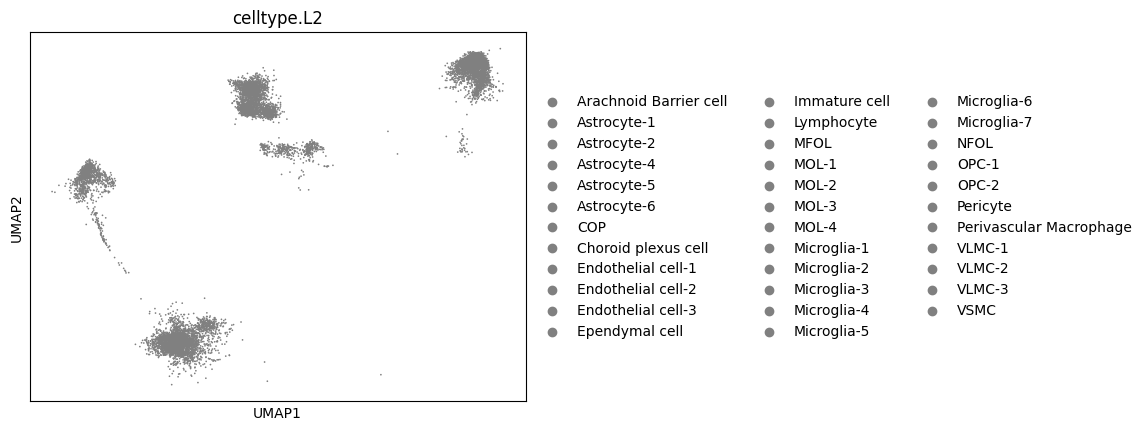

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


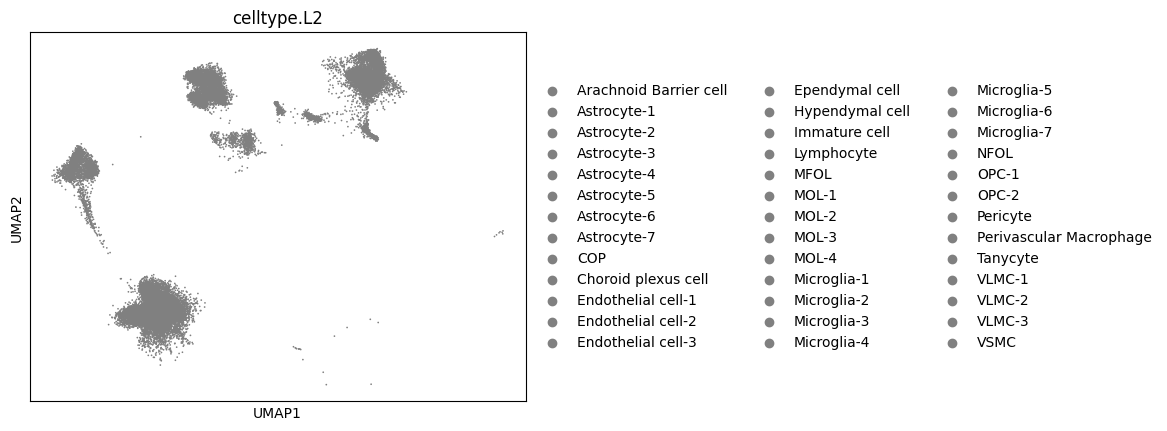

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


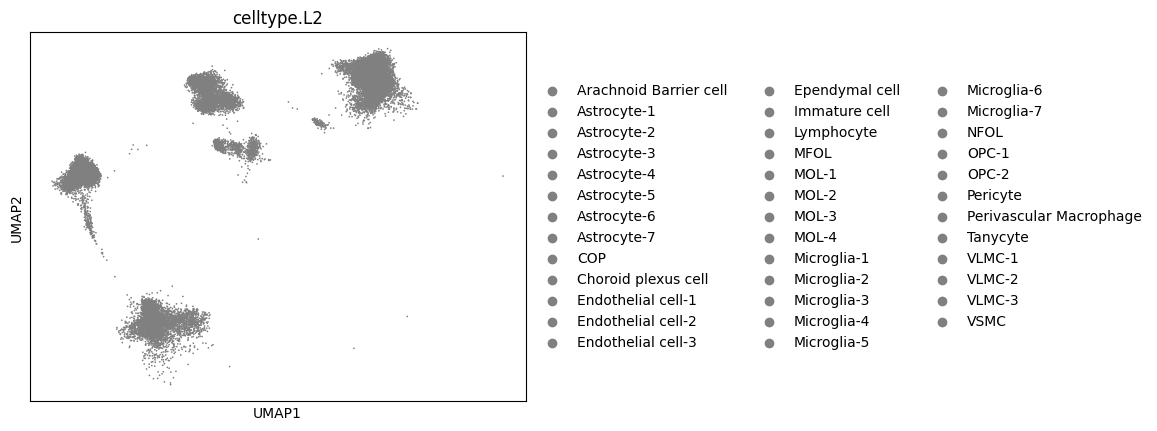

... storing 'Sample' as categorical
... storing 'sample' as categorical
... storing 'MajorRegion' as categorical
... storing 'RegionName' as categorical
... storing 'DetailRegion' as categorical


In [92]:
for region in adata_sc.obs['region'].unique():
    adata_atac_region_neuron = adata_atlas_3r[(adata_atlas_3r.obs['region']==region) & (adata_atlas_3r.obs['NeuronTransmitter'].isin(['NN']))]         
    adata_sc_region_neuron = adata_sc[adata_sc.obs.region.isin([region]) & (~adata_sc.obs.Neurotransmitter_celltype.isin(['GABAergic', 'Glutamatergic']))]

    # downsample the sc or atac data to the same number of cells
    n_cells = min(adata_sc_region_neuron.shape[0], adata_atac_region_neuron.shape[0])
    if n_cells!= adata_sc_region_neuron.shape[0]:
        adata_sc_region_neuron = sc.pp.subsample(adata_sc_region_neuron, n_obs=n_cells,copy=True)
    else:
        adata_atac_region_neuron = sc.pp.subsample(adata_atac_region_neuron, n_obs=n_cells,copy=True)        

    sc.pl.umap(adata_sc_region_neuron, color=['celltype.L2'],size=6, show=True)
    #sc.pp.normalize_per_cell(adata_atac_region_neuron)
    adata_atac_region_neuron.X.max()
    n_top_genes = 20000
    sc.pp.highly_variable_genes(adata_atac_region_neuron, n_top_genes=n_top_genes, batch_key="sample")

    sc.pp.highly_variable_genes(adata_sc_region_neuron, n_top_genes=n_top_genes, batch_key="sample")
    sc_hvf = adata_sc_region_neuron.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_top_genes].index
    atac_hvf = adata_atac_region_neuron.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_top_genes].index
    hvfs = atac_hvf.intersection(sc_hvf)
    # query = adata_atac_region_neuron[:,hvfs].copy()
    # reference = adata_sc_region_neuron[:,hvfs].copy()

    query = adata_atac_region_neuron
    reference = adata_sc_region_neuron

    query.obs['celltype.L2'] = pd.NA

    data = ad.concat(
        [reference, query],
        join='inner',
        label='batch',
        keys=["reference", "query"],
        index_unique='_',
    )
    data

    #sc.pl.umap(data, color=['celltype.L2'], size=6, show=True)
    sc.pp.filter_genes(data, min_cells=5)
    sc.pp.filter_cells(data, min_genes=200)
    sc.pp.highly_variable_genes(
        data,
        n_top_genes = 5000,
        batch_key="batch"
    )

    sc.pp.pca(data, n_comps=100,)
    data.write_h5ad(f'/data2st1/junyi/output/atac0627/{region}_atlassc_NN.h5ad')

In [237]:
sum(adata_atac_region_neuron.layers['count'].sum(axis=1)>1000)

matrix([[57654]])

In [244]:
scvi.model.SCVI.setup_anndata(data, batch_key="batch")
vae = scvi.model.SCVI(
    data,
    n_layers=2,
    n_latent=5,
    gene_likelihood="nb",
    dispersion="gene-batch"
)


In [245]:
vae.train(max_epochs=1000, early_stopping=True)

INFO: Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
2025-04-23 17:01:50 - INFO - Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
2025-04-23 17:01:50 - INFO - GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
2025-04-23 17:01:50 - INFO - TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
2025-04-23 17:01:50 - INFO - HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
2025-0

Epoch 1/1000:   0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: Expected parameter loc (Tensor of shape (128, 5)) of distribution Normal(loc: torch.Size([128, 5]), scale: torch.Size([128, 5])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
data_harmony = sc.read_h5ad(f'/data2st1/junyi/output/HIP_atacsc_neuronlamb0.1_nclust8.harmony.h5ad')


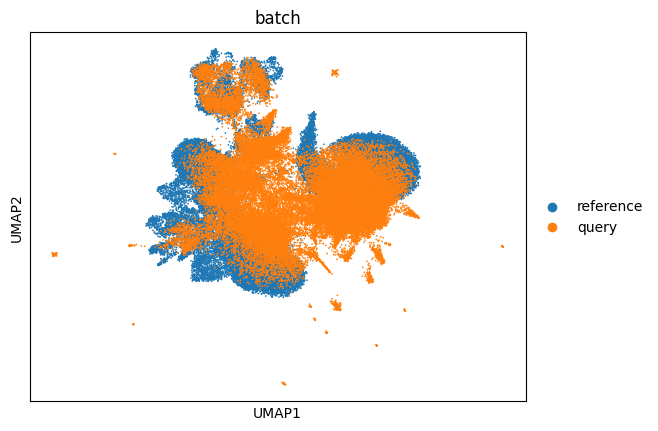

In [151]:
sc.pl.umap(data_harmony, color=['batch'], size=6, show=True)

In [ ]:
# sc.pp.neighbors(adata_atac_selected)
# sc.tl.leiden(adata_atac_selected, resolution=1)
# sc.tl.umap(adata_atac_selected)
dump_embedding(adata_atac_selected, 'umap')


In [ ]:
dump_embedding(adata_atac_selected, 'umap')
#dump_embedding(adata_atac_selected, 'umap_seurat')


In [ ]:
fig, axes = plt.subplots(figsize=(12, 4), dpi=250, ncols=2)

ax = axes[0]
_ = categorical_scatter(data=adata_atac_selected.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='leiden',
                        palette='tab20',
                        text_anno='leiden')
ax = axes[1]
_ = categorical_scatter(data=adata_atac_selected.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='leiden',
                        palette='tab20',
                        text_anno='leiden')



In [ ]:
n_components = significant_pc_test(adata_atac_selected)


In [ ]:
fig, axes = plot_decomp_scatters(adata_atac_selected,
                                 n_components=n_components,
                                 hue=None,
                                 hue_quantile=(0.25, 0.75),
                                 nrows=5,
                                 ncols=5)

In [ ]:
adata_atac_selected.layers["counts"] = adata_atac_selected.X.copy()
sc.pp.normalize_total(adata_atac_selected)
# Logarithmize the data
sc.pp.log1p(adata_atac_selected)


In [ ]:
# n_genes = 10000
sc.pp.highly_variable_genes(adata_atac_selected, n_top_genes=n_genes, n_bins=20) 

In [ ]:
adata_atac_selected.var['gene_id'] = adata_atac_selected.var.index.str.split('.').str[0]

In [ ]:
adata_atac_selected.var.set_index('gene_id',inplace=True)

In [ ]:
# Preprocess the gene to ensemble id mapping
df_gene = pd.read_csv('/data2st1/junyi/generegion_vM33/genebody.bed',index_col=0,sep='\t',header=None)
df_gene_map = df_gene.iloc[:,[4,5]]
df_gene_map.columns = ['gene_id','gene_name']

df_gene_map.drop_duplicates(subset='gene_id',inplace=True)
df_result = df_gene_map.merge(adata_atac_selected.var,left_on='gene_id',right_index=True,how='right')
rows_with_missing_gene_name = df_result[df_result['gene_id'].isnull()]

df_result.loc[rows_with_missing_gene_name.index,'gene_id'] = df_result.loc[rows_with_missing_gene_name.index,'gene_name']

df_result['chr']= df_result.index
df_result.columns =['gene_name', 'gene_id', 'highly_variable', 'means', 'dispersions','dispersions_norm', 'chr']
df_result.set_index('gene_name',inplace=True)
df_result['gene_id'] = df_result['gene_id'].str.split('.').str[0]
df_result['gene_name'] = df_result.index

In [ ]:
df_result.loc[df_result.gene_id.isnull(),'gene_id'] = df_result.loc[df_result.gene_id.isnull(),'gene_name'] 

In [ ]:
adata_atac_selected.var = df_result.set_index('gene_id')

In [ ]:
adata_atac_selected.var_names_make_unique()

In [ ]:
sc.pp.highly_variable_genes(adata_sc, n_top_genes=n_genes, n_bins=20) 

In [ ]:
sc_hvf_list = adata_sc.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index
mcg_hvf_list = mcg.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index
mch_hvf_list = mch.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index
atac_hvf_list = adata_atac_selected.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index


In [ ]:
atac_hvf_list

In [ ]:
hvfs = mcg_hvf_list.intersection(sc_hvf_list).intersection(mcg_hvf_list).intersection(atac_hvf_list)

In [ ]:
adata_sc_selected = adata_sc

In [ ]:
sc_hvf_adata = adata_sc_selected[:,hvfs].copy()
sc.pp.scale(sc_hvf_adata)
sc_hvf_adata

In [ ]:
mcg.var.index = mcg.var.index.astype(str)
mcg.obs.index = mcg.obs.index.astype(str)
mch.var.index = mch.var.index.astype(str)
mch.obs.index = mch.obs.index.astype(str)

In [ ]:
mcg_hvf_adata = mcg[:,hvfs].copy()
sc.pp.scale(mcg_hvf_adata)
mcg_hvf_adata.X *=-1

In [ ]:
mch_hvf_adata = mch[:,hvfs].copy()
sc.pp.scale(mch_hvf_adata)
mch_hvf_adata.X *=-1

In [ ]:
from ALLCools.pseudo_cell import generate_pseudo_cells_kmeans

adata_atac_pseudo = generate_pseudo_cells_kmeans(adata_atac_selected,
                                            cluster_col='leiden',
                                            obsm='X_pca',
                                            cluster_size_cutoff=100,
                                            max_pseudo_size=50,
                                            aggregate_func='downsample')


In [ ]:
adata_atac_pseudo
sc.pp.normalize_per_cell(adata_atac_pseudo)
sc.pp.log1p(adata_atac_pseudo)

In [ ]:
sc.pp.highly_variable_genes(adata_atac_pseudo, n_top_genes=10000, n_bins=100)
sc.pl.highly_variable_genes(adata_atac_pseudo)
test_adata = adata_atac_pseudo[:, adata_atac_pseudo.var['highly_variable']].copy()


In [ ]:
sc.pp.scale(test_adata)
sc.tl.pca(test_adata)
sc.pp.neighbors(test_adata)
sc.tl.umap(test_adata)
sc.tl.leiden(test_adata)
test_adata.obs['group'] = test_adata.obs_names.map(lambda i: '.'.join(i.split('.')[:2]))

In [ ]:
test_adata.obs['lenden_snap'] = adata_atac_pseudo.obs['leiden']

In [ ]:
sc.pl.umap(test_adata, color=['leiden','ENSMUSG00000076439'],size=150)

In [ ]:
sc.pl.umap(adata_atac_selected, color=['leiden'],size=150) 

In [ ]:
adata_atac_pseudo.obs['leiden_snap'] = adata_atac_pseudo.obs['leiden']

In [ ]:
adata_atac_pseudo.write_h5ad(f'output/ATAC.PseudoCellAdata.3regions.h5ad')

In [ ]:
adata_sc_pseudo = generate_pseudo_cells_kmeans(adata_sc,
                                            cluster_col='celltype.L1',
                                            obsm='X_pca',
                                            cluster_size_cutoff=100,
                                            max_pseudo_size=50,
                                            aggregate_func='downsample')

In [ ]:
adata_sc_pseudo

In [ ]:
sc.pp.normalize_per_cell(adata_sc_pseudo)
sc.pp.log1p(adata_sc_pseudo)

sc.pp.highly_variable_genes(adata_sc_pseudo, n_top_genes=10000, n_bins=100)
sc.pl.highly_variable_genes(adata_sc_pseudo)
test_adata = adata_sc_pseudo[:, adata_sc_pseudo.var['highly_variable']].copy()


In [ ]:
# remove low cov gene
adata_sc_pseudo.write_h5ad(f'output/PseudoCellAdata.3regions.h5ad')


In [ ]:
sc.pp.scale(test_adata)
sc.tl.pca(test_adata)
sc.pp.neighbors(test_adata)
sc.tl.umap(test_adata)
sc.tl.leiden(test_adata)


In [ ]:
sc.pl.umap(adata_sc, color=['celltype.L1'],size=50)

In [ ]:
sc.pl.umap(test_adata, color=['leiden','celltype.L1'],size=50)

In [ ]:
adata_atac_selected.obs.to_csv('output/ATAC.3regions.MetaData.csv.gz')
adata_sc_selected.obs.to_csv('output/Brain.3regions.MetaData.csv.gz')

In [ ]:
atac_hvf_adata = adata_atac_selected[:,hvfs].copy()
sc.pp.scale(atac_hvf_adata)

In [ ]:
adata_concat = sc_hvf_adata.concatenate([
    mcg_hvf_adata,
    mch_hvf_adata,
    atac_hvf_adata
    
],
                                index_unique='-')
adata_concat.obs['batch'] = adata_concat.obs['batch'].map({
    '0': 'sc',
    '1': 'mcg',
    '2': 'mch',
    '3': 'atac'
    })
adata_concat

In [ ]:
sc.pp.pca(adata_concat, n_comps=50)
sc.pl.pca_variance_ratio(adata_concat)
n_components = significant_pc_test(adata_concat, p_cutoff=0.2)


In [ ]:
adata_concat.obs['predicted_doublet'].fillna('False',inplace=True)
adata_concat.obs["predicted_doublet"] = adata_concat.obs["predicted_doublet"].astype(bool)

adata_concat.var['mt-0'] = adata_concat.var["mt-0"].astype(bool)
#adata_concat.var['highly_variable-0-0'] = adata_concat.var["highly_variable-0-0"].astype(bool)
#adata_concat.var['highly_variable-1-0'] = adata_concat.var["highly_variable-1-0"].astype(bool)
#adata_concat.var['highly_variable-0'] = adata_concat.var["highly_variable-0"].astype(bool)

adata_concat.obs['PassBasicQC'] = adata_concat.obs["PassBasicQC"].astype(bool)


In [ ]:
adata_concat.write_h5ad('output/merged-3region-concat-clustering.h5ad')

In [ ]:
scps_hvf_list = adata_sc_pseudo.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index
atacps_hvf_list = adata_atac_pseudo.var['dispersions_norm'].sort_values(ascending=False).dropna()[:n_genes].index


In [ ]:
hvfs = mcg_hvf_list.intersection(scps_hvf_list).intersection(mcg_hvf_list).intersection(atacps_hvf_list)

In [ ]:
len(hvfs)

In [ ]:
sc_hvf_pseudo_adata = adata_sc_pseudo[:,hvfs].copy()
atac_hvf_pseudo_adata = adata_atac_pseudo[:,hvfs].copy()

mcg_hvf_pseudo_adata = mcg[:,hvfs].copy()
mch_hvf_pseudo_adata  = mch[:,hvfs].copy()

In [ ]:
adata_pse_concat = sc_hvf_pseudo_adata.concatenate([
    mcg_hvf_pseudo_adata,
    mch_hvf_pseudo_adata,
    atac_hvf_pseudo_adata
    
],
                                index_unique='-')
adata_pse_concat.obs['batch'] = adata_pse_concat.obs['batch'].map({
    '0': 'sc',
    '1': 'mcg',
    '2': 'mch',
    '3': 'atac'
    })
adata_pse_concat

In [ ]:
sc.pp.pca(adata_pse_concat, n_comps=50)
sc.pl.pca_variance_ratio(adata_pse_concat)
n_components = significant_pc_test(adata_pse_concat, p_cutoff=0.2)


In [ ]:
#adata_pse_concat.obs['predicted_doublet'].fillna('False',inplace=True)
#adata_pse_concat.obs["predicted_doublet"] = adata_pse_concat.obs["predicted_doublet"].astype(bool)

adata_pse_concat.var['mt-0'] = adata_pse_concat.var["mt-0"].astype(bool)
#adata_concat.var['highly_variable-0-0'] = adata_concat.var["highly_variable-0-0"].astype(bool)
#adata_concat.var['highly_variable-1-0'] = adata_concat.var["highly_variable-1-0"].astype(bool)
#adata_concat.var['highly_variable-0'] = adata_concat.var["highly_variable-0"].astype(bool)

adata_pse_concat.obs['PassBasicQC'] = adata_pse_concat.obs["PassBasicQC"].astype(bool)


In [ ]:
adata_pse_concat.write_h5ad('output/merged-3region-pseudo-clustering.h5ad')

In [ ]:
atacsn = scps_hvf_list.intersection(atacps_hvf_list)

In [ ]:
pse_atac = adata_atac_pseudo[:,atacsn].copy()
pse_sc = adata_sc_pseudo[:,atacsn].copy()

In [ ]:
adata_pse_concat = pse_atac.concatenate([
    pse_sc    
],
                                index_unique='-')
adata_pse_concat.obs['batch'] = adata_pse_concat.obs['batch'].map({
    '0': 'sc',
    '1': 'atac'
    })
adata_pse_concat

In [ ]:
sc.pp.pca(adata_pse_concat, n_comps=50)
sc.pl.pca_variance_ratio(adata_pse_concat)
n_components = significant_pc_test(adata_pse_concat, p_cutoff=0.2)


In [ ]:
adata_pse_concat.write_h5ad('output/atacsc-3region-pseudo-clustering.h5ad')

In [ ]:
atacsn = sc_hvf_list.intersection(atac_hvf_list)

In [ ]:
sub_atac = adata_atac_selected[:,atacsn].copy()
sub_sc = adata_sc[:,atacsn].copy()

In [ ]:
adata_sub_concat = sub_sc.concatenate([
    sub_atac    
],
                                index_unique='-')
adata_sub_concat.obs['batch'] = adata_sub_concat.obs['batch'].map({
    '0': 'sc',
    '1': 'atac'
    })
adata_sub_concat

In [ ]:
#adata_pse_concat.obs['predicted_doublet'].fillna('False',inplace=True)
#adata_pse_concat.obs["predicted_doublet"] = adata_pse_concat.obs["predicted_doublet"].astype(bool)

adata_sub_concat.var['mt-0'] = adata_sub_concat.var["mt-0"].astype(bool)
#adata_concat.var['highly_variable-0-0'] = adata_concat.var["highly_variable-0-0"].astype(bool)
#adata_concat.var['highly_variable-1-0'] = adata_concat.var["highly_variable-1-0"].astype(bool)
#adata_concat.var['highly_variable-0'] = adata_concat.var["highly_variable-0"].astype(bool)

#adata_sub_concat.obs['PassBasicQC'] = adata_sub_concat.obs["PassBasicQC"].astype(bool)


In [ ]:
adata_sub_concat.write_h5ad('output/atacsc-3region-clustering.h5ad')

In [ ]:
sc.pp.neighbors(adata_concat, n_neighbors=5)
sc.tl.leiden(adata_concat, resolution=1.5)
sc.tl.umap(adata_concat)


In [ ]:
_ = plot_decomp_scatters(adata_concat,
                         n_components=n_components,
                         hue='batch',
                         palette='tab10')

In [ ]:
adata_concat.obs['umap_0'] = adata_concat.obsm['X_umap'][:, 0]
adata_concat.obs['umap_1'] = adata_concat.obsm['X_umap'][:, 1]


In [ ]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

ax = axes[0]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='batch',
                    show_legend=True,
                    max_points=None,
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=adata_concat,
                    hue='pred_Class',
                    show_legend=True,
                    max_points=None,
                    s=1)

In [ ]:
adata_concat.obs.columns

In [ ]:
adata_concat.obs[adata_concat.obs['batch'] == 'mcg'].copy().columns

In [ ]:
fig, axes = plt.subplots(figsize=(8, 3), dpi=250, ncols=2)

data = adata_concat.obs[adata_concat.obs['batch'] == 'mcg'].copy()
#data['MajorType'] = data['SubType'].str.split('_').str[-1]
data2 = adata_concat.obs[adata_concat.obs['batch'] == 'atac'].copy()


ax = axes[0]
categorical_scatter(ax=ax,
                    data=data,
                    show_legend=False,
                    max_points=None,
                    hue='SubRegion',
                    text_anno='SubRegion',
                    s=1)

ax = axes[1]
categorical_scatter(ax=ax,
                    data=data2,
                    hue='leiden',
                    show_legend=True,
                    text_anno='leiden',

                    max_points=None,
                    s=1)

In [ ]:
adata_sc.obs.columns

In [ ]:
df_pred_class=pd.DataFrame(pd.crosstab(adata_concat.obs['pred_Class'], adata_concat.obs['leiden']).idxmax())

In [ ]:
df_class=pd.DataFrame(pd.crosstab(adata_concat.obs['Class'], adata_concat.obs['leiden']).idxmax())

In [ ]:
df_type_merged = df_pred_class.merge(df_class,how='outer',left_index=True,right_index=True).fillna(method='ffill').fillna(method='bfill')
df_type_merged.columns = ['pred_Class','Class']

In [ ]:
lei_map_class = dict(zip(df_type_merged.index,df_type_merged['Class']))
lei_map_pred_class = dict(zip(df_type_merged.index,df_type_merged['pred_Class']))

In [ ]:
adata_concat.obs

In [ ]:
adata_concat.obs

In [ ]:
mapped_class = []
mappled_preclass = []
for inde,row in (adata_concat.obs).iterrows():
    if row['leiden'] not in lei_map_class:
        mapped_class.append(row['leiden'])
        mappled_preclass.append(row['leiden'])
    else:
        mapped_class.append(lei_map_class[row['leiden']])
        mappled_preclass.append(lei_map_pred_class[row['leiden']])  


In [ ]:
adata_concat.obs['mapped_class'] = mapped_class
adata_concat.obs['mappled_preclass'] = mappled_preclass

In [ ]:
interactive_scatter(data=adata_concat,
                    hue='mappled_preclass',
                    coord_base='umap',
                    max_points=20000)

In [ ]:
interactive_scatter(data=adata_concat,
                    hue='mappled_preclass',
                    coord_base='umap',
                    max_points=10000)

In [ ]:
adata_concat.obs

In [ ]:
sc._utils.sanitize_anndata(adata_concat)

In [ ]:
adata_concat.obs['predicted_doublet'].fillna('False',inplace=True)
adata_concat.obs["predicted_doublet"] = adata_concat.obs["predicted_doublet"].astype(bool)

adata_concat.var['mt-0'] = adata_concat.var["mt-0"].astype(bool)
adata_concat.var['highly_variable-0-0'] = adata_concat.var["highly_variable-0-0"].astype(bool)
adata_concat.var['highly_variable-1-0'] = adata_concat.var["highly_variable-1-0"].astype(bool)
adata_concat.var['highly_variable-0'] = adata_concat.var["highly_variable-0"].astype(bool)


In [ ]:
adata_concat.write_h5ad('output/merged-clustering.h5ad')